In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import metrics
from sklearn import datasets

In [2]:
df = pd.read_csv('/Users/sonu/Documents/aiml/assignments/c3/5/liver_disease_.csv')
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [3]:
# finding row with missing values
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)
# The missing values a

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio Dataset  
209      3.9                         NaN     Yes  
241      3.1                         NaN     Yes  
253      2.7                         NaN      No  
312      4.8            

In [4]:
# replacing missing values with mean, since there are no evident outliers that could bias the model
agr_mean = df['Albumin_and_Globulin_Ratio'].mean()
df['Albumin_and_Globulin_Ratio'].fillna(agr_mean, inplace=True)
# gender has whitespace
df['Gender'] = df['Gender'].str.strip()

In [5]:
# convert gender to Ordinal
# replace categorical feautures with numerical labels as KNN wont work with non numerical data
df['Gender'] = df['Gender'].replace({"Male":1})
df['Gender'] = df['Gender'].replace({"Female":0})

In [6]:
# Separate the data into variables and result
X = df.drop('Dataset', axis=1).values
y = df['Dataset'].values
y_ = df['Dataset'].replace({"Yes":1, "No": 0})

numf = X.size/y.size
print("Num Features :", numf)

Num Features : 10.0


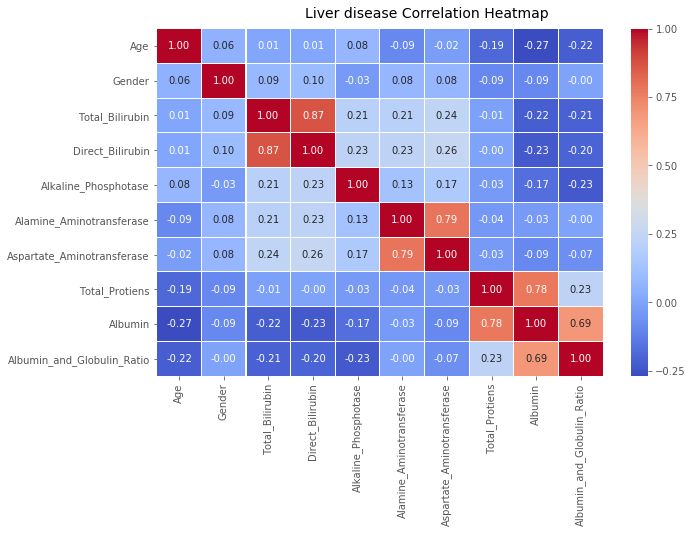

In [7]:
import seaborn as sns

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Liver disease Correlation Heatmap', fontsize=14)

Text(0.5, 0, 'Liver Disease')

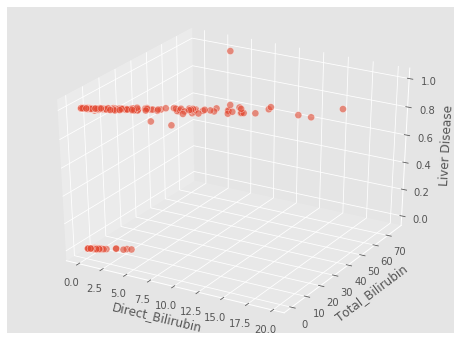

In [8]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['Direct_Bilirubin']
ys = df['Total_Bilirubin']
zs = y_
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Direct_Bilirubin')
ax.set_ylabel('Total_Bilirubin')
ax.set_zlabel('Liver Disease')

Text(0.5, 0, 'Liver Disease')

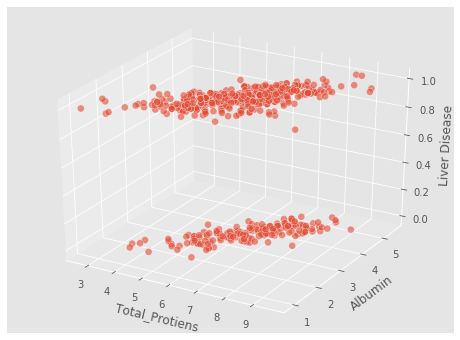

In [9]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['Total_Protiens']
ys = df['Albumin']
zs = y_
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Total_Protiens')
ax.set_ylabel('Albumin')
ax.set_zlabel('Liver Disease')

In [10]:
# Load the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42, stratify=y)

## Using Sparse kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# Accuracy
y_pred = svclassifier.predict(X_test)
pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'], margins=True)

## Using Polynomial kernel

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00        67
         Yes       0.71      1.00      0.83       167

   micro avg       0.71      0.71      0.71       234
   macro avg       0.36      0.50      0.42       234
weighted avg       0.51      0.71      0.59       234



/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Using Gaussian kernel

In [16]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      0.01      0.03        67
         Yes       0.72      1.00      0.84       167

   micro avg       0.72      0.72      0.72       234
   macro avg       0.86      0.51      0.43       234
weighted avg       0.80      0.72      0.60       234



# using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Cs = [.001,.01,.1,1,10]
gammas = [.001,.01,.1,1]
grid = {'C': Cs, 'gamma': gammas, 'kernel': ['linear']}
grid_search = GridSearchCV(SVC(), grid, cv=2)

In [ ]:
grid_search.fit(X,y)

In [ ]:
print(grid_search.best_params_)

In [ ]:
print(grid_search.best_estimator_)

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))